# 1-Propanol_2-Propanol Prediction

In [1]:
import pandas as pd
import numpy as np

In [2]:
# prompt: mount drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Research Work/Kalida/Snehanshu/dataset_1_2.csv")

In [12]:
df.head()

,Conc,Cg/Ca,Target
0,1000,30.211669,0
1,1000,30.245772,0
2,1000,30.258737,0
3,1000,30.300169,0
4,1000,30.330045,0


In [4]:
df.columns

Index(['Conc', 'Cg/Ca', 'Target'], dtype='object')

<Axes: ylabel='count'>

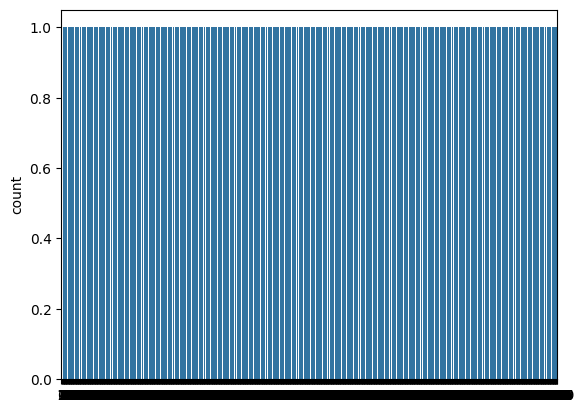

In [5]:
import seaborn as sns
#Plot the unique values

sns.countplot(df['Target'])


In [6]:
X = df.drop('Target', axis=1)
y = df['Target']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=0)

# Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [9]:
y_pred = classifier.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score

print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  1.0


In [11]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[110   0]
 [  0 130]]


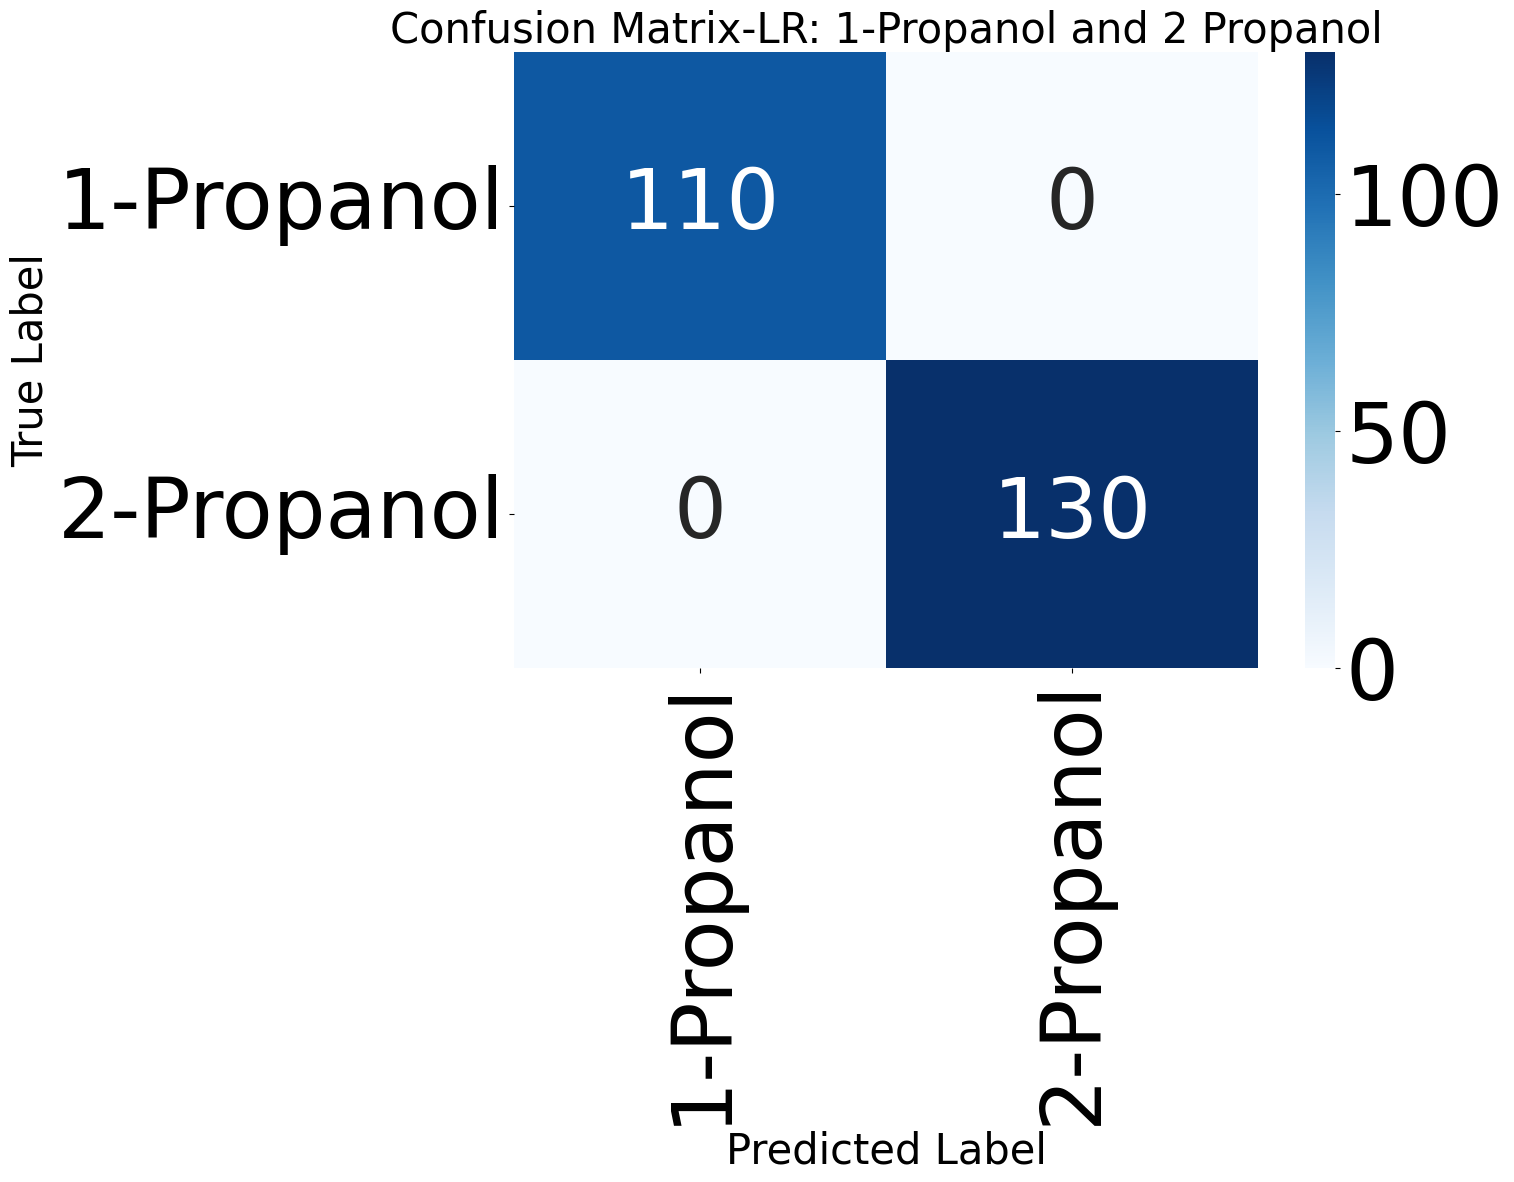

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
# Define the class names
plt.figure(figsize=(12, 8))
class_names = ['1-Propanol', '2-Propanol']

plt.rcParams.update({'font.size': 60})

sns.heatmap(cm,annot=True,fmt="d", xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted Label',fontsize = 30)
plt.ylabel('True Label',fontsize = 30)
plt.title('Confusion Matrix-LR: 1-Propanol and 2 Propanol',fontsize = 30)
plt.show()

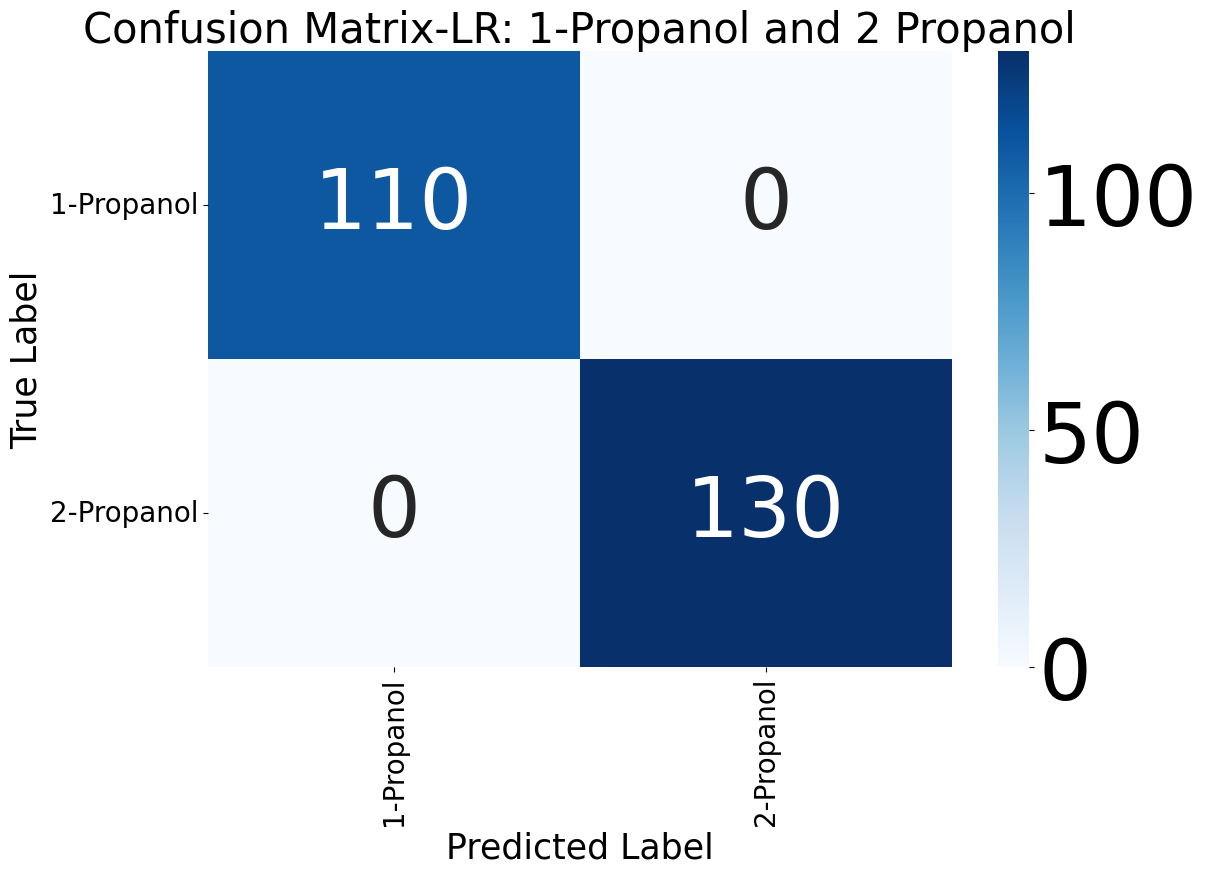

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
# Define the class names
plt.figure(figsize=(12, 8))
class_names = ['1-Propanol', '2-Propanol']

# Increase font size for class names (xticklabels and yticklabels)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names, cmap='Blues',
            cbar=True, annot_kws={"size": 60})  # Adjust annot_kws for annotation size

plt.xticks(fontsize=20) # Font size for x tick labels
plt.yticks(fontsize=20) # Font size for y tick labels
plt.xlabel('Predicted Label', fontsize=25)
plt.ylabel('True Label', fontsize=25)
plt.title('Confusion Matrix-LR: 1-Propanol and 2 Propanol', fontsize=30)
plt.show()

In [32]:
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
y_pred = classifier.predict(X_test)
r = recall_score(y_test, y_pred, average='macro')
p = precision_score(y_test, y_pred, average='macro')
print('recall:',r)
print('precision:',p)
f1_score1 = (2* (p * r)) / (p + r)
print('f1:',f1_score1)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

recall: 1.0
precision: 1.0
f1: 1.0
Accuracy: 1.000


# Random Forest

In [33]:
#Random Forest
#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_rf.fit(X_train, y_train)
ac = accuracy_score(y_test,classifier_rf.predict(X_test))
#print(x_text)
print('Accuracy is: RF',ac)

Accuracy is: RF 1.0


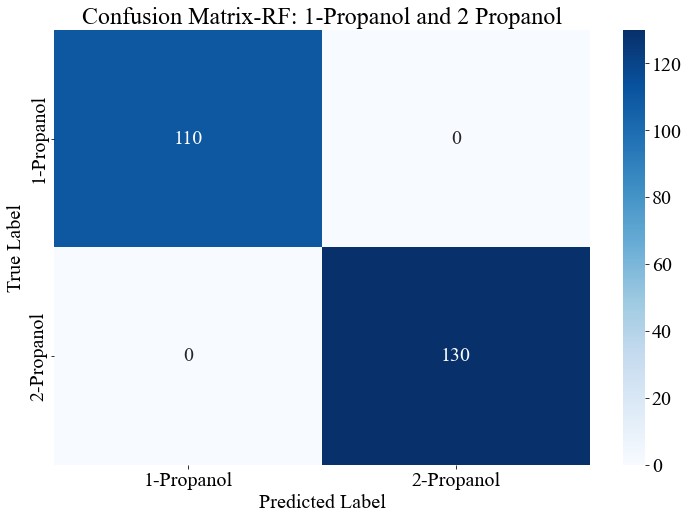

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,classifier_rf.predict(X_test))
# Define the class names
class_names = ['1-Propanol', '2-Propanol']
plt.rcParams.update({'font.family': 'Times New Roman', 'font.size': 35})
plt.figure(figsize=(12, 8))
sns.heatmap(cm,annot=True,fmt="d", xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix-RF: 1-Propanol and 2 Propanol')
plt.show()

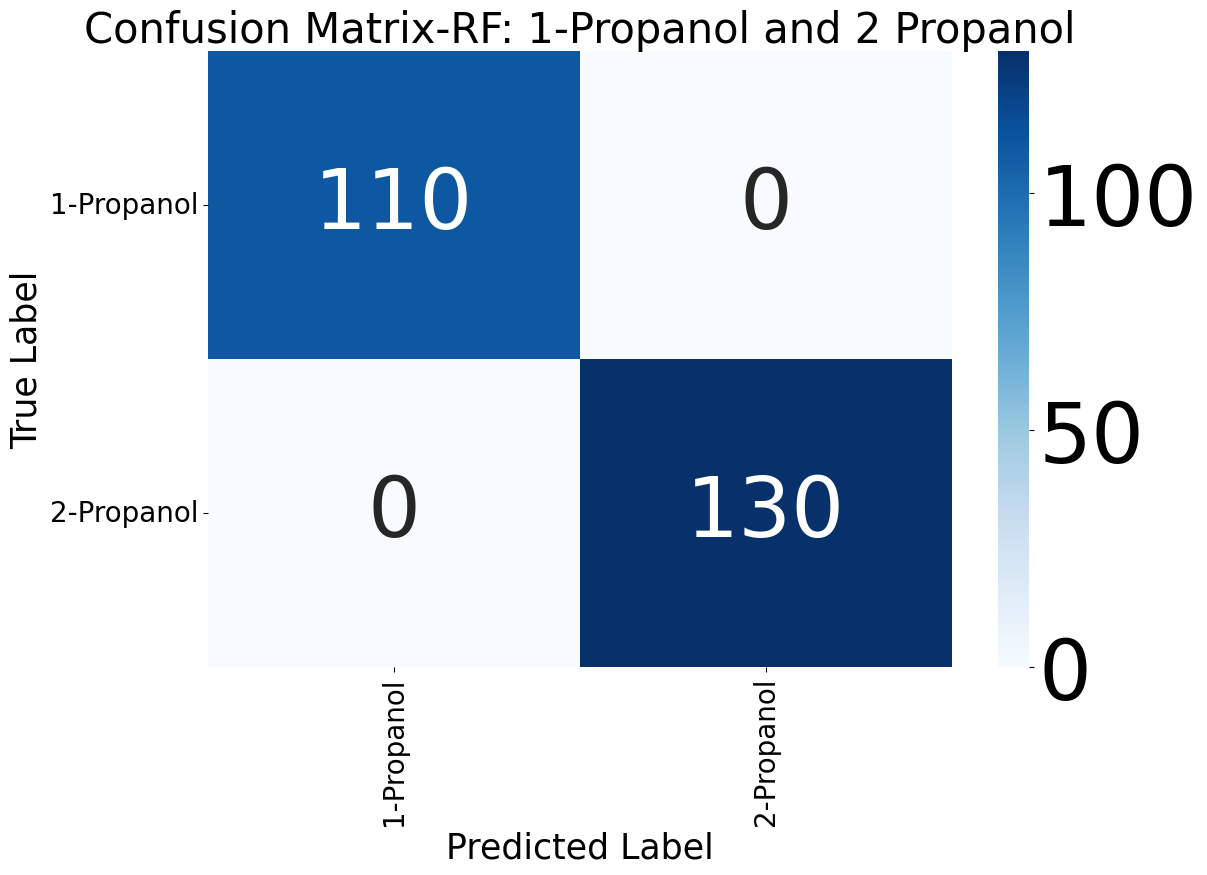

In [34]:
cm = confusion_matrix(y_test,classifier_rf.predict(X_test))
# Define the class names
plt.figure(figsize=(12, 8))
class_names = ['1-Propanol', '2-Propanol']

# Increase font size for class names (xticklabels and yticklabels)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names, cmap='Blues',
            cbar=True, annot_kws={"size": 60})  # Adjust annot_kws for annotation size

plt.xticks(fontsize=20) # Font size for x tick labels
plt.yticks(fontsize=20) # Font size for y tick labels
plt.xlabel('Predicted Label', fontsize=25)
plt.ylabel('True Label', fontsize=25)
plt.title('Confusion Matrix-RF: 1-Propanol and 2 Propanol', fontsize=30)
plt.show()

In [35]:
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
y_pred = classifier_rf .predict(X_test)
r = recall_score(y_test, y_pred, average='macro')
p = precision_score(y_test, y_pred, average='macro')
print('recall:',r)
print('precision:',p)
f1_score1 = (2* (p * r)) / (p + r)
print('f1:',f1_score1)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

recall: 1.0
precision: 1.0
f1: 1.0
Accuracy: 1.000


# Knearest Neighbor

In [36]:
##Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn.fit(X_train, y_train)
ac = accuracy_score(y_test,classifier_knn.predict(X_test))
print('Accuracy is KNN: ',ac)

Accuracy is KNN:  1.0


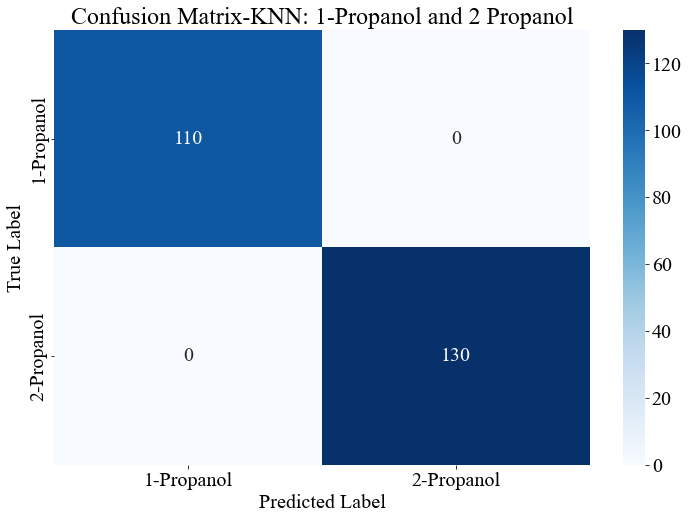

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,classifier_knn.predict(X_test))
# Define the class names
class_names = ['1-Propanol', '2-Propanol']
plt.rcParams.update({'font.family': 'Times New Roman', 'font.size': 20})
plt.figure(figsize=(12, 8))
sns.heatmap(cm,annot=True,fmt="d", xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix-KNN: 1-Propanol and 2 Propanol')
plt.show()

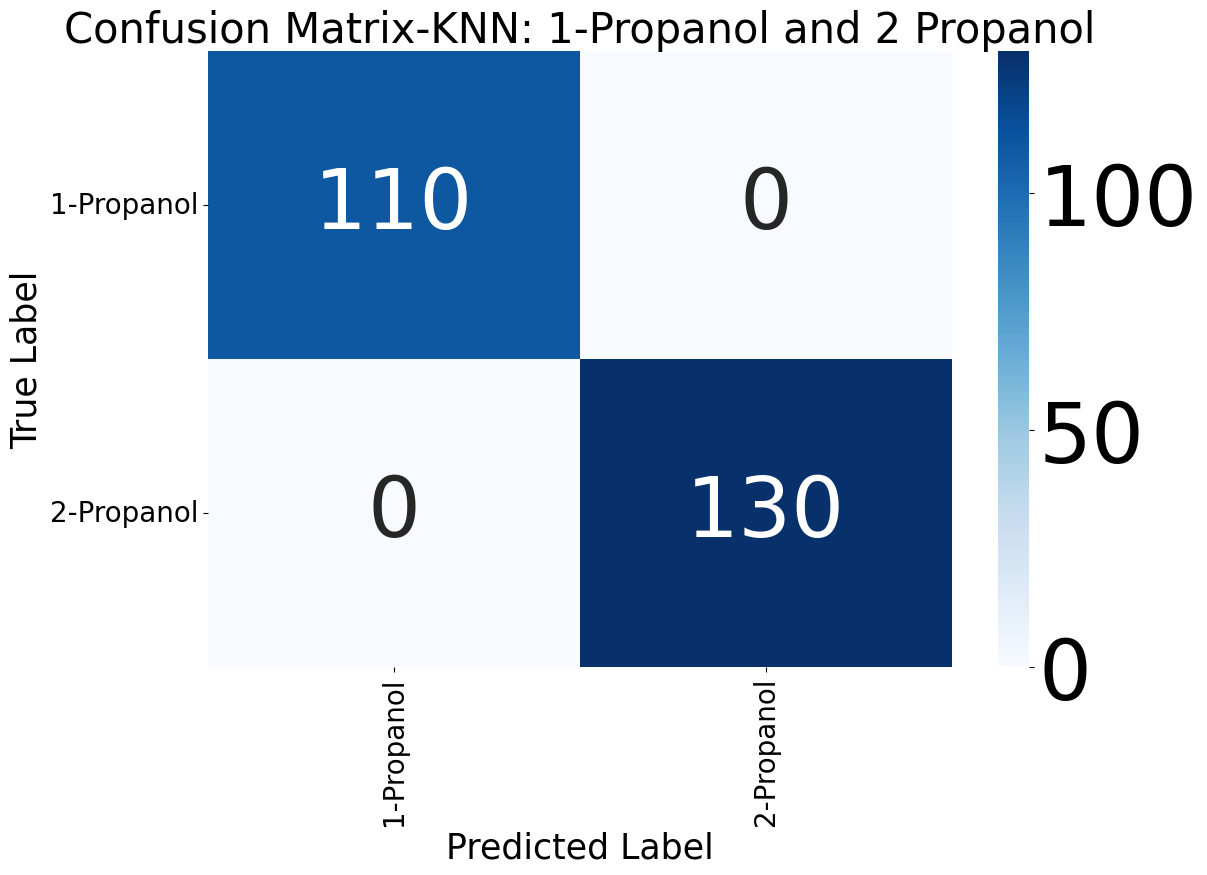

In [38]:
cm = confusion_matrix(y_test,classifier_knn.predict(X_test))
# Define the class names
plt.figure(figsize=(12, 8))
class_names = ['1-Propanol', '2-Propanol']

# Increase font size for class names (xticklabels and yticklabels)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names, cmap='Blues',
            cbar=True, annot_kws={"size": 60})  # Adjust annot_kws for annotation size

plt.xticks(fontsize=20) # Font size for x tick labels
plt.yticks(fontsize=20) # Font size for y tick labels
plt.xlabel('Predicted Label', fontsize=25)
plt.ylabel('True Label', fontsize=25)
plt.title('Confusion Matrix-KNN: 1-Propanol and 2 Propanol', fontsize=30)
plt.show()

In [39]:
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
y_pred = classifier_knn .predict(X_test)
r = recall_score(y_test, y_pred, average='macro')
p = precision_score(y_test, y_pred, average='macro')
print('recall:',r)
print('precision:',p)
f1_score1 = (2* (p * r)) / (p + r)
print('f1:',f1_score1)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

recall: 1.0
precision: 1.0
f1: 1.0
Accuracy: 1.000


# Support Vector machine

In [40]:
#SVM
from sklearn.svm import SVC
classifier_svm = SVC(kernel = 'rbf', random_state = 0, probability=True)
classifier_svm.fit(X_train, y_train)
ac = accuracy_score(y_test,classifier_svm.predict(X_test))
#print(x_text)
print('Accuracy is SVM: ',ac)

Accuracy is SVM:  0.4583333333333333


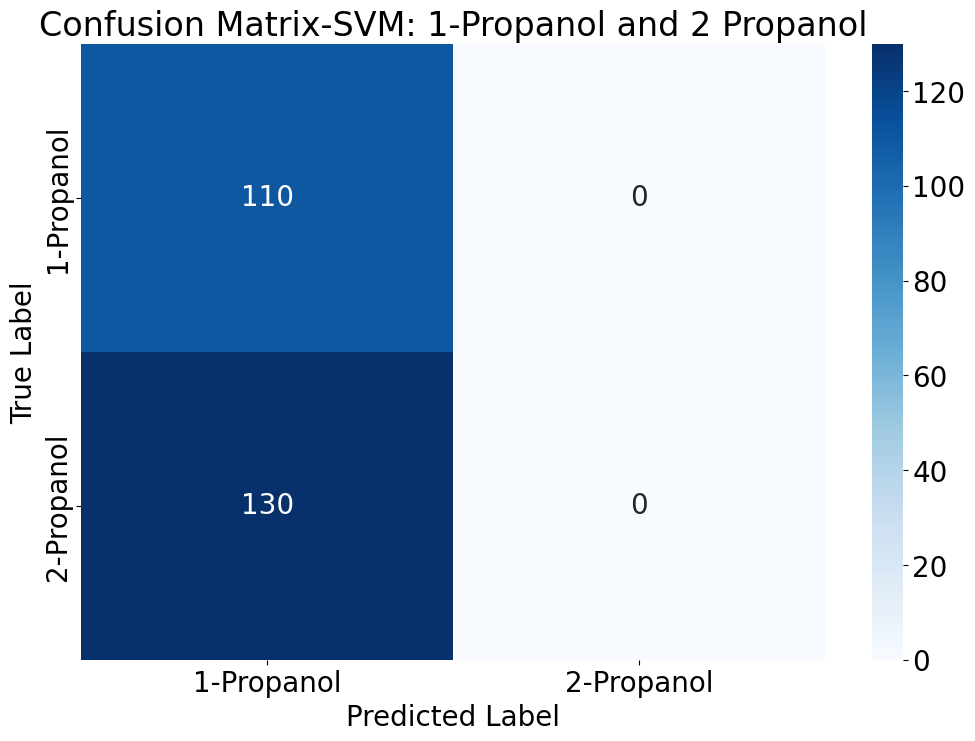

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,classifier_svm.predict(X_test))
# Define the class names
class_names = ['1-Propanol', '2-Propanol']
plt.rcParams.update({'font.family': 'Times New Roman', 'font.size': 20})
plt.figure(figsize=(12, 8))
sns.heatmap(cm,annot=True,fmt="d", xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix-SVM: 1-Propanol and 2 Propanol')
plt.show()

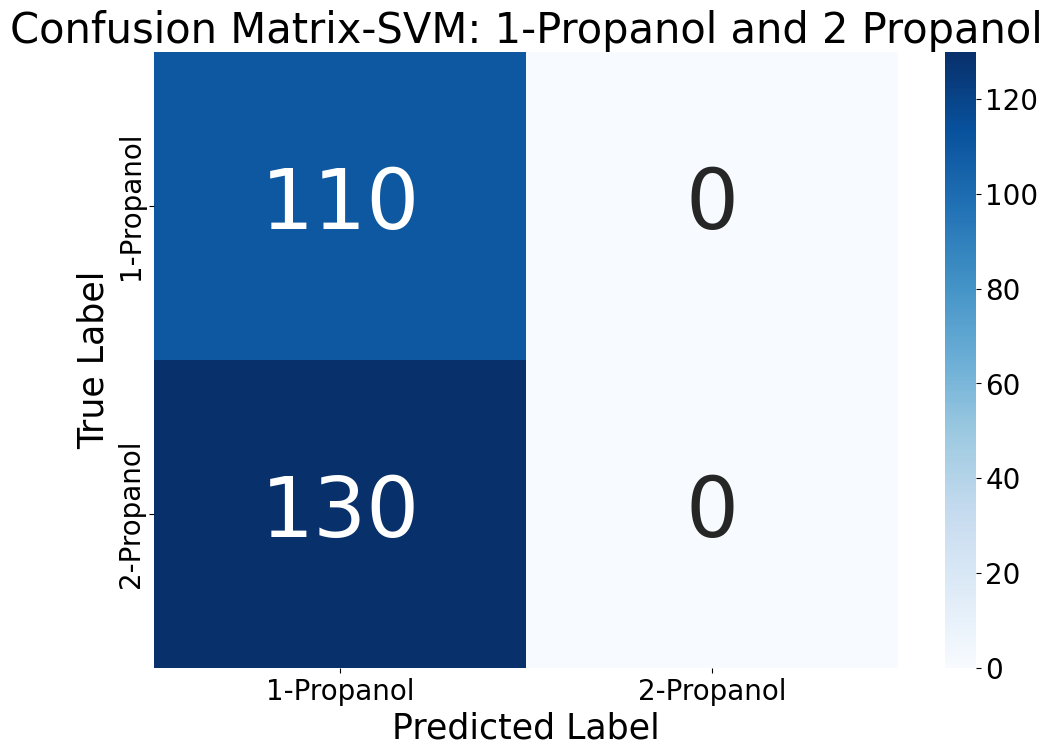

In [43]:
cm = confusion_matrix(y_test,classifier_svm.predict(X_test))
# Define the class names
plt.figure(figsize=(12, 8))
class_names = ['1-Propanol', '2-Propanol']

# Increase font size for class names (xticklabels and yticklabels)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names, cmap='Blues',
            cbar=True, annot_kws={"size": 60})  # Adjust annot_kws for annotation size

plt.xticks(fontsize=20) # Font size for x tick labels
plt.yticks(fontsize=20) # Font size for y tick labels
plt.xlabel('Predicted Label', fontsize=25)
plt.ylabel('True Label', fontsize=25)
plt.title('Confusion Matrix-SVM: 1-Propanol and 2 Propanol', fontsize=30)
plt.show()

In [ ]:
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
y_pred = classifier_svm .predict(X_test)
r = recall_score(y_test, y_pred, average='macro')
p = precision_score(y_test, y_pred, average='macro')
print('recall:',r)
print('precision:',p)
f1_score1 = (2* (p * r)) / (p + r)
print('f1:',f1_score1)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

recall: 0.5
precision: 0.22916666666666666
f1: 0.3142857142857143
Accuracy: 0.458


C:\Users\amita\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 1-propnal and 2-propanol concentration wise (1000)

In [ ]:
df = pd.read_csv("C:/Users/amita/My_Code/Snehanshu/dataset_1_2_1000.csv")

In [ ]:
len(df)

400

In [ ]:
df.columns

Index(['Conc', 'Cg/Ca', 'Target'], dtype='object')

In [ ]:
X = df.drop('Target', axis=1)
y = df['Target']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=0)

# Logistics Regrassion

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier_lr = LogisticRegression(random_state = 0)
classifier_lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

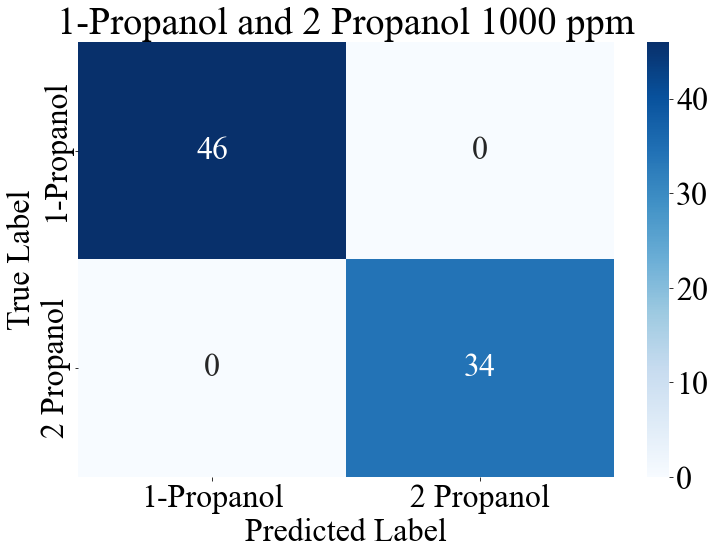

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, classifier_lr.predict(X_test))
# Define the class names
class_names = ['1-Propanol', '2 Propanol']
plt.rcParams.update({'font.family': 'Times New Roman', 'font.size': 32})
plt.figure(figsize=(12, 8))
sns.heatmap(cm,annot=True,fmt="d", xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('1-Propanol and 2 Propanol 1000 ppm')
plt.show()

In [ ]:
y_test

132    0
309    1
341    1
196    0
246    1
      ..
14     0
363    1
304    1
361    1
329    1
Name: Target, Length: 80, dtype: int64

# 1-Propanol 2-Propanol with Concentration

In [44]:
df = pd.read_csv("/content/drive/MyDrive/Research Work/Kalida/Snehanshu/dataset_1_2_with_concentration.csv")

In [ ]:
df.columns

Index(['Conc', 'Cg/Ca', 'lsomer_type', 'Target'], dtype='object')

In [ ]:
df.count()

,0
Conc,1600
Cg/Ca,1600
lsomer_type,1600
Target,1600


In [45]:
X = df.drop('Target', axis=1)
y = df['Target']

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=4)

In [ ]:
y_test.count()

320

# Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

classifier_lr = LogisticRegression(random_state = 0)
classifier_lr.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

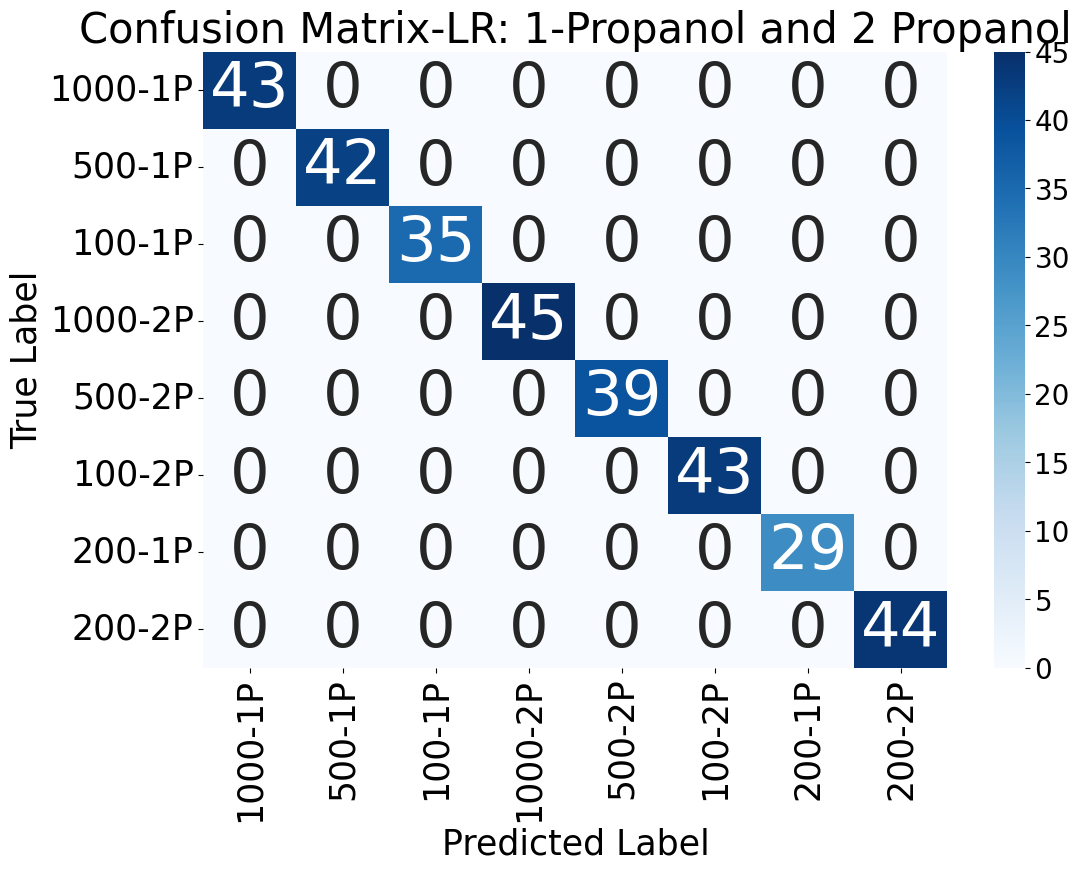

In [50]:
cm = confusion_matrix(y_test, classifier_lr.predict(X_test))
# Define the class names
plt.figure(figsize=(12, 8))
class_names = ['1000-1P', '500-1P', '100-1P', '1000-2P', '500-2P', '100-2P', '200-1P', '200-2P']

# Increase font size for class names (xticklabels and yticklabels)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names, cmap='Blues',
            cbar=True, annot_kws={"size": 45})  # Adjust annot_kws for annotation size

plt.xticks(fontsize=25) # Font size for x tick labels
plt.yticks(fontsize=25) # Font size for y tick labels
plt.xlabel('Predicted Label', fontsize=25)
plt.ylabel('True Label', fontsize=25)
plt.title('Confusion Matrix-LR: 1-Propanol and 2 Propanol', fontsize=30)
plt.show()

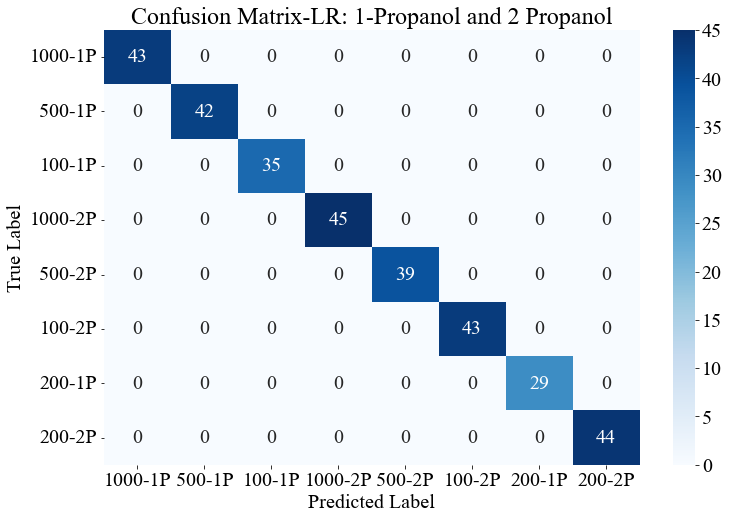

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, classifier_lr.predict(X_test))
# Define the class names
class_names = ['1000-1P', '500-1P', '100-1P', '1000-2P', '500-2P', '100-2P', '200-1P', '200-2P']
plt.rcParams.update({'font.family': 'Times New Roman', 'font.size': 20})
plt.figure(figsize=(12, 8))
sns.heatmap(cm,annot=True,fmt="d", xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix-LR: 1-Propanol and 2 Propanol')
plt.show()

#KNN

In [51]:
##Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn.fit(X_train, y_train)
ac = accuracy_score(y_test,classifier_knn.predict(X_test))
print('Accuracy is KNN: ',ac)

Accuracy is KNN:  1.0


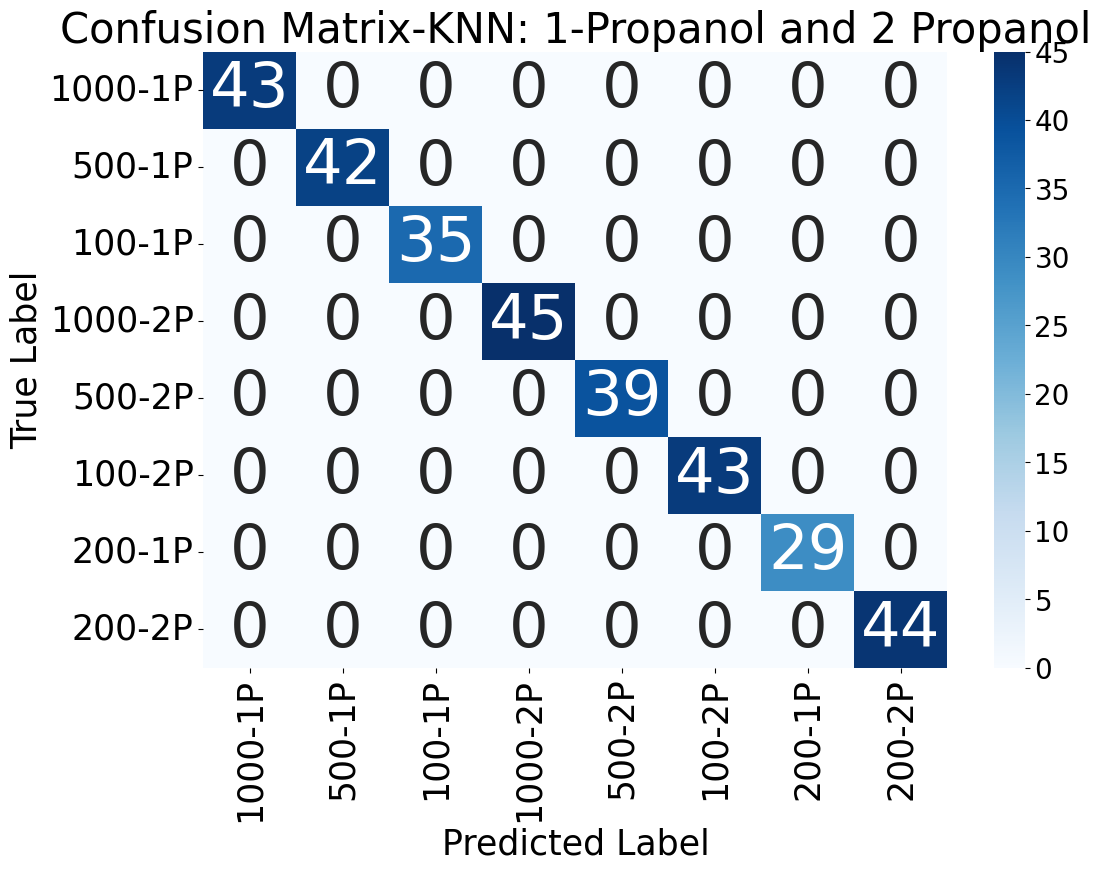

In [52]:
cm = confusion_matrix(y_test,classifier_knn.predict(X_test))
# Define the class names
plt.figure(figsize=(12, 8))
class_names = ['1000-1P', '500-1P', '100-1P', '1000-2P', '500-2P', '100-2P', '200-1P', '200-2P']

# Increase font size for class names (xticklabels and yticklabels)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names, cmap='Blues',
            cbar=True, annot_kws={"size": 45})  # Adjust annot_kws for annotation size

plt.xticks(fontsize=25) # Font size for x tick labels
plt.yticks(fontsize=25) # Font size for y tick labels
plt.xlabel('Predicted Label', fontsize=25)
plt.ylabel('True Label', fontsize=25)
plt.title('Confusion Matrix-KNN: 1-Propanol and 2 Propanol', fontsize=30)
plt.show()

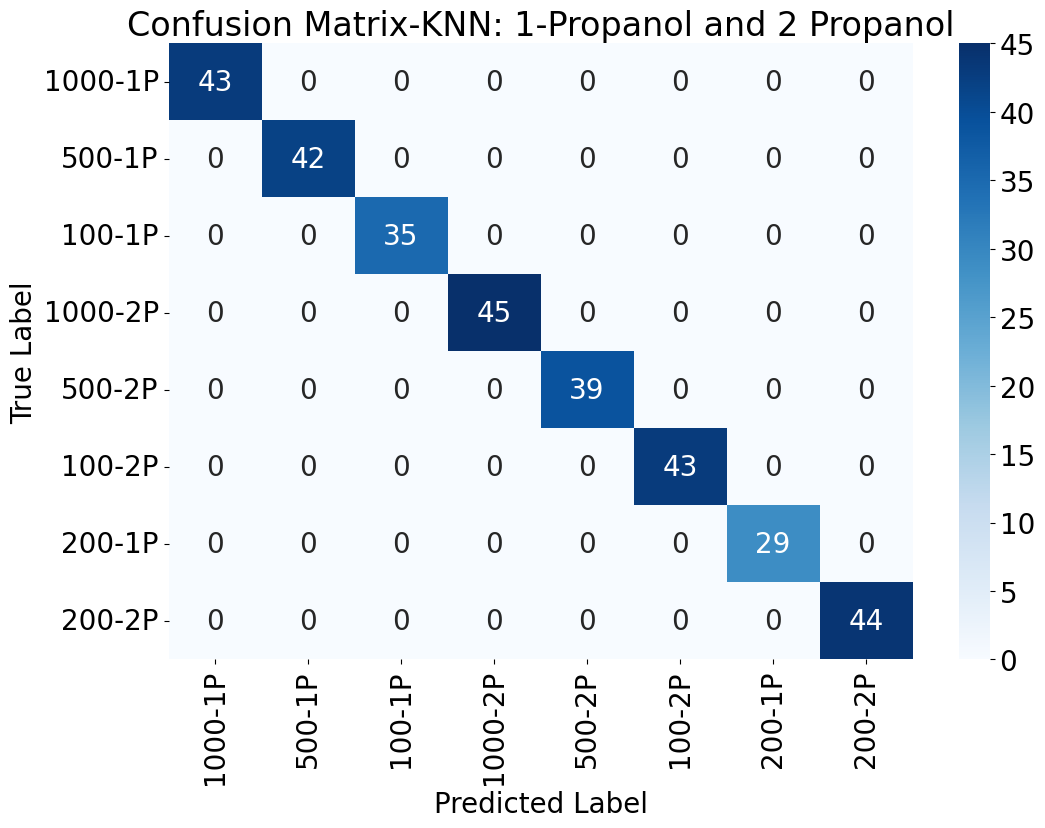

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,classifier_knn.predict(X_test))
# Define the class names
class_names = ['1000-1P', '500-1P', '100-1P', '1000-2P', '500-2P', '100-2P', '200-1P', '200-2P']
plt.rcParams.update({'font.family': 'Times New Roman', 'font.size': 20})
plt.figure(figsize=(12, 8))
sns.heatmap(cm,annot=True,fmt="d", xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix-KNN: 1-Propanol and 2 Propanol')
plt.show()

#Random Forest

In [59]:
#Random Forest
#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_rf.fit(X_train, y_train)
ac = accuracy_score(y_test,classifier_rf.predict(X_test))
#print(x_text)
print('Accuracy is: RF',ac)

Accuracy is: RF 1.0


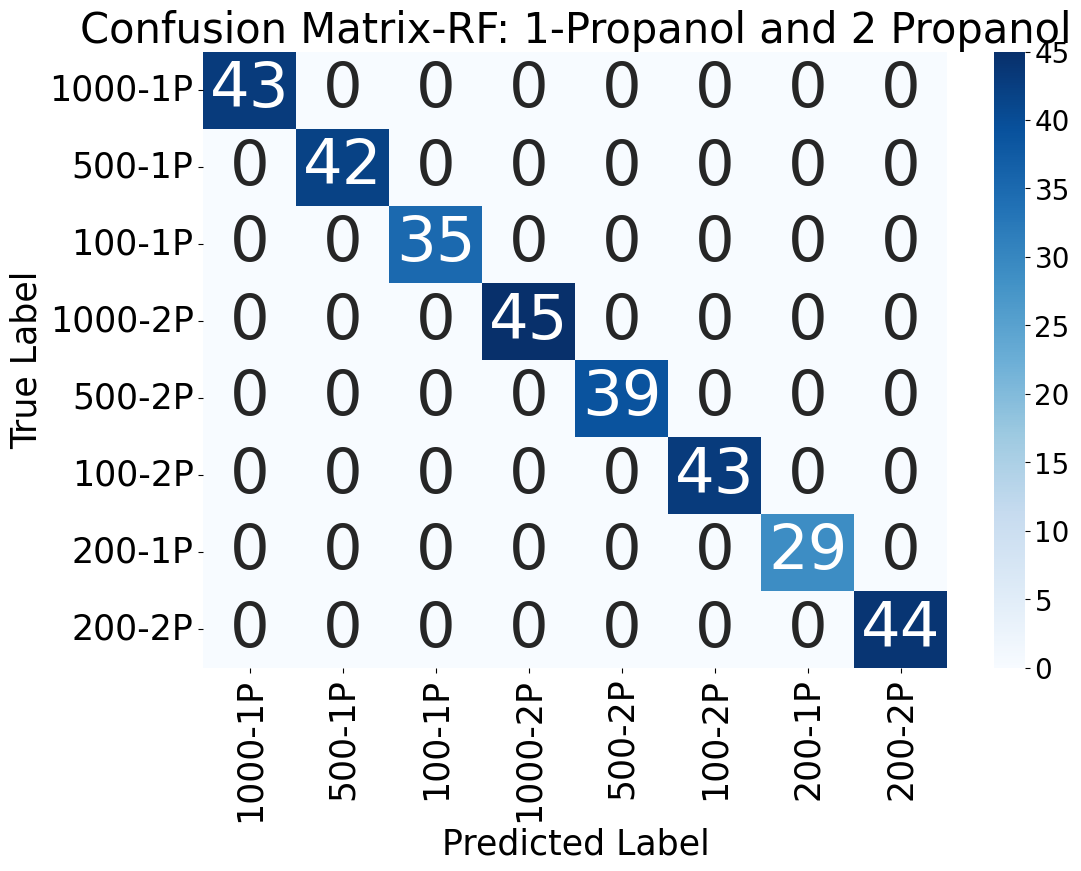

In [60]:
cm = confusion_matrix(y_test,classifier_rf.predict(X_test))
# Define the class names
plt.figure(figsize=(12, 8))
class_names = ['1000-1P', '500-1P', '100-1P', '1000-2P', '500-2P', '100-2P', '200-1P', '200-2P']

# Increase font size for class names (xticklabels and yticklabels)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names, cmap='Blues',
            cbar=True, annot_kws={"size": 45})  # Adjust annot_kws for annotation size

plt.xticks(fontsize=25) # Font size for x tick labels
plt.yticks(fontsize=25) # Font size for y tick labels
plt.xlabel('Predicted Label', fontsize=25)
plt.ylabel('True Label', fontsize=25)
plt.title('Confusion Matrix-RF: 1-Propanol and 2 Propanol', fontsize=30)
plt.show()

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,classifier_rf.predict(X_test))
# Define the class names
class_names = ['1000-1P', '500-1P', '100-1P', '1000-2P', '500-2P', '100-2P', '200-1P', '200-2P']
plt.rcParams.update({'font.size': 30})
plt.figure(figsize=(12, 8))
sns.heatmap(cm,annot=True,fmt="d", xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix-RF: 1-Propanol and 2 Propanol')
plt.show()

NameError: name 'classifier_rf' is not defined

#SVM

In [55]:
#SVM
from sklearn.svm import SVC
classifier_svm = SVC(kernel = 'rbf', random_state = 0, probability=True)
classifier_svm.fit(X_train, y_train)
ac = accuracy_score(y_test,classifier_svm.predict(X_test))
#print(x_text)
print('Accuracy is SVM: ',ac)

Accuracy is SVM:  0.45625


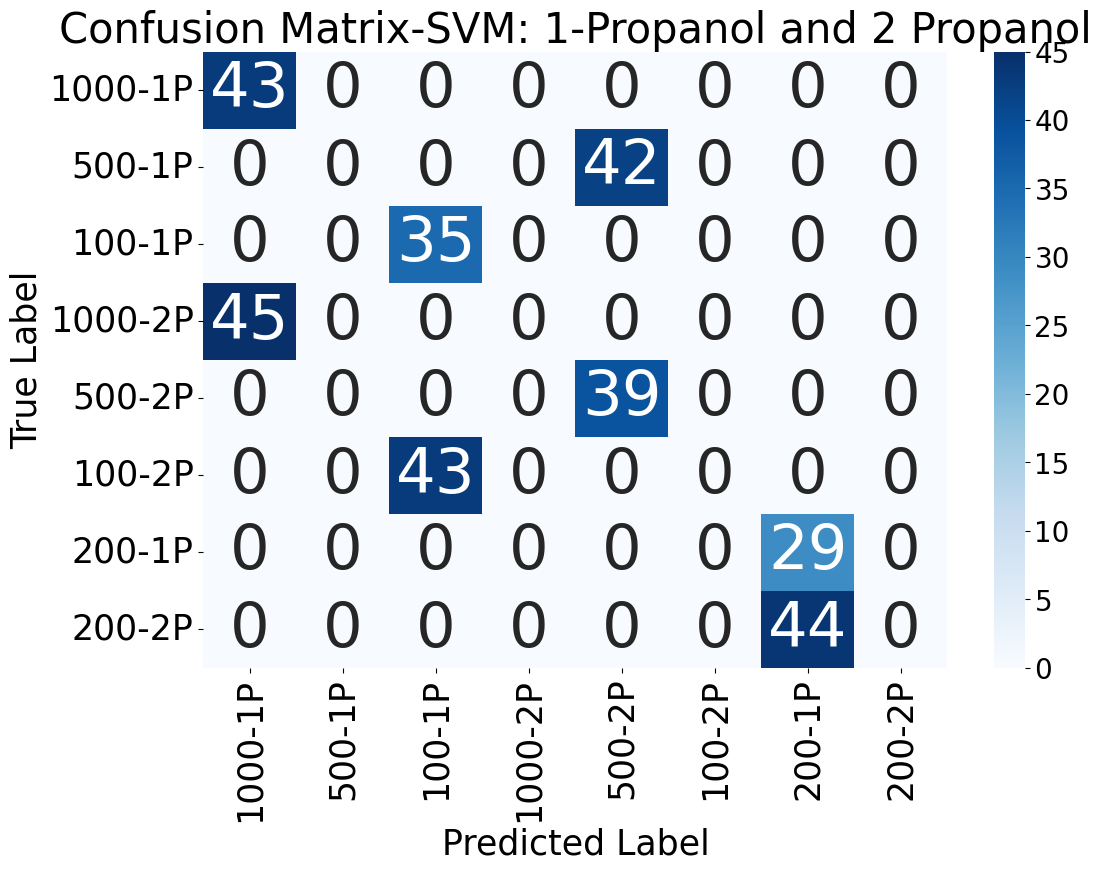

In [57]:
cm = confusion_matrix(y_test,classifier_svm.predict(X_test))
# Define the class names
plt.figure(figsize=(12, 8))
class_names = ['1000-1P', '500-1P', '100-1P', '1000-2P', '500-2P', '100-2P', '200-1P', '200-2P']

# Increase font size for class names (xticklabels and yticklabels)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names, cmap='Blues',
            cbar=True, annot_kws={"size": 45})  # Adjust annot_kws for annotation size

plt.xticks(fontsize=25) # Font size for x tick labels
plt.yticks(fontsize=25) # Font size for y tick labels
plt.xlabel('Predicted Label', fontsize=25)
plt.ylabel('True Label', fontsize=25)
plt.title('Confusion Matrix-SVM: 1-Propanol and 2 Propanol', fontsize=30)
plt.show()

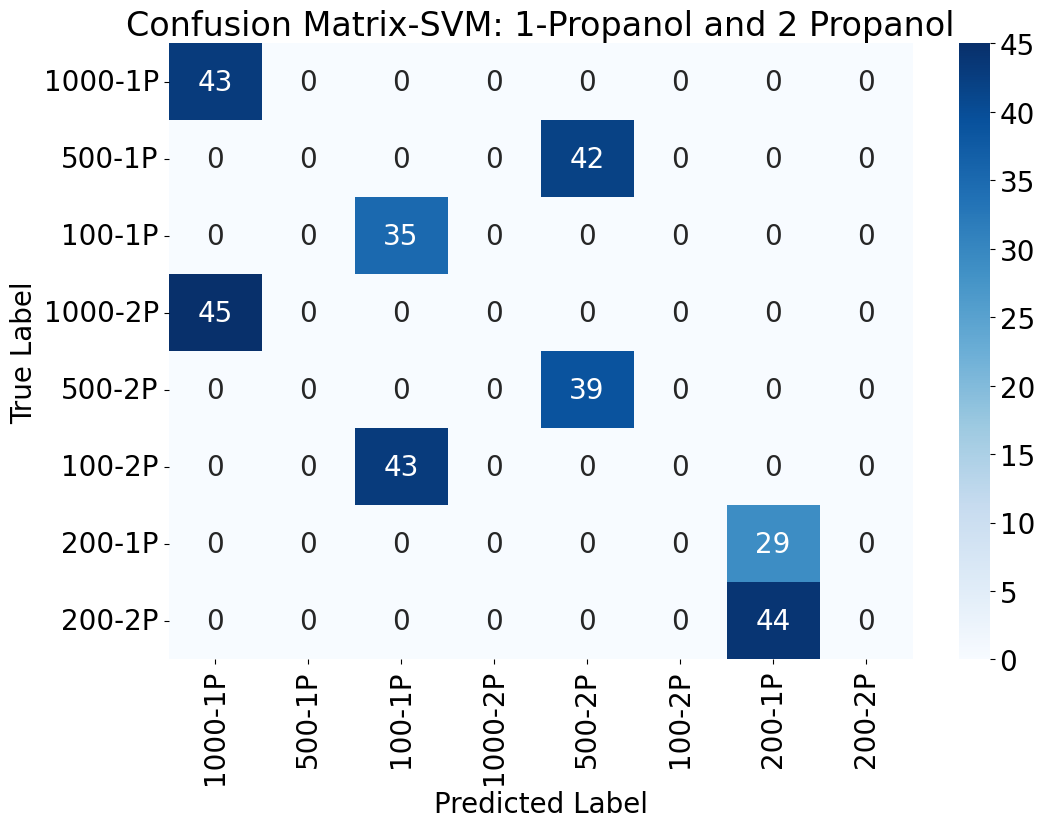

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,classifier_svm.predict(X_test))
# Define the class names
class_names = ['1000-1P', '500-1P', '100-1P', '1000-2P', '500-2P', '100-2P', '200-1P', '200-2P']
plt.rcParams.update({'font.family': 'Times New Roman', 'font.size': 20})
plt.figure(figsize=(12, 8))
sns.heatmap(cm,annot=True,fmt="d", xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix-SVM: 1-Propanol and 2 Propanol')
plt.show()

In [ ]:
import pandas as pd
data = {
    "Time_1P": [220.43955, 221.45994, 222.48031, 223.6917, 224.81606, 225.83644, 226.85681, 228.06819,
                 229.38355, 230.50787, 231.71927, 232.73965, 233.76001, 234.78038, 235.80075, 236.82112,
                 237.84149, 238.86187, 239.88223, 240.90262, 241.92297],
    "Current_1P": [1.20E-07, 1.37E-07, 1.68E-07, 1.91E-07, 2.29E-07, 2.73E-07, 3.58E-07, 5.19E-07,
                   7.23E-07, 9.43E-07, 1.18E-06, 1.42E-06, 1.64E-06, 1.83E-06, 2.00E-06, 2.15E-06,
                   2.27E-06, 2.38E-06, 2.47E-06, 2.60E-06, 2.69E-06],
    "Time_2P": [866.93434, 867.95472, 869.1661, 870.48146, 871.6058, 872.8172, 873.94154, 874.96192,
                 875.9823, 877.19367, 878.21405, 879.23443, 880.25479, 881.27516, 882.29554, 883.31591,
                 884.33628, 885.35664, 886.377, 887.39736, 888.41773],
    "Current_2P": [2.39E-07, 2.68E-07, 3.11E-07, 3.59E-07, 4.37E-07, 5.26E-07, 6.30E-07, 7.20E-07,
                   8.07E-07, 8.88E-07, 9.94E-07, 1.09E-06, 1.20E-06, 1.29E-06, 1.36E-06, 1.42E-06,
                   1.49E-06, 1.52E-06, 1.55E-06, 1.56E-06, 1.57E-06]
}

df = pd.DataFrame(data)

In [ ]:
df

,Time_1P,Current_1P,Time_2P,Current_2P
0,220.43955,1.200000e-07,866.93434,2.390000e-07
1,221.45994,1.370000e-07,867.95472,2.680000e-07
2,222.48031,1.680000e-07,869.16610,3.110000e-07
3,223.69170,1.910000e-07,870.48146,3.590000e-07
4,224.81606,2.290000e-07,871.60580,4.370000e-07
5,225.83644,2.730000e-07,872.81720,5.260000e-07
6,226.85681,3.580000e-07,873.94154,6.300000e-07
7,228.06819,5.190000e-07,874.96192,7.200000e-07
8,229.38355,7.230000e-07,875.98230,8.070000e-07
9,230.50787,9.430000e-07,877.19367,8.880000e-07
